# Supervised learning

#### Cilj projekta je isprobavanje različitih metoda mašinskog učenja nad prethodno pripremljenim podacima

## Učitavanje i priprema podataka 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import math

cancer_data1= pd.read_csv("train1.csv")
cancer_data2= pd.read_csv("train2.csv")

#### Korišćeni dataset se sastoji iz dva dela koje je potrebno sastviti u jedan

In [2]:
cancer_data = pd.concat([cancer_data1, cancer_data2])

In [3]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


#### Kolona ID ne nosi bitne informacije, pa ju je potrebno izbrisati


In [4]:
cancer_data.drop(['id'], axis=1, inplace=True)

#### Pored brisanja kolona koje nisu bitne, potrebno je sve kategoričke atribite, pretvoriti u numeričke. U konkretnom slučaju postoji samo jedan takav atribut

In [5]:
cancer_data['diagnosis'] = [1 if b=='M' else 0 for b in cancer_data.diagnosis]

In [8]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,0,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,0,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


## Balansiranje stabla

In [9]:
cancer_data['diagnosis'].value_counts()

0    356
1    212
Name: diagnosis, dtype: int64

#### Pošto se broj entiteta koji prpadaju jednoj klasi, razlikuje od broja entiteta koji pripadaju drugoj, potrebno je svesti ih na isti broj (balansirati dataset).
#### Postoji više načina:
   #### 1. Dodavanje entiteta klase koja ima manje
   #### 2. Brisanje entiteta klase koja ima više
   #### 3. Postaviti parametar algoritmu, tako da on programski balansira dataset

In [17]:
from sklearn.utils import resample

majority_data = cancer_data[cancer_data.diagnosis==0]
minority_data = cancer_data[cancer_data.diagnosis==1]

majority_data_downsampled = resample(majority_data, replace=False, n_samples=212, random_state=123)

cancer_data_downsampled = pd.concat([majority_data_downsampled, minority_data])
cancer_data_downsampled.diagnosis.value_counts()

1    212
0    212
Name: diagnosis, dtype: int64

## Podela podataka na train i test

In [22]:
X= cancer_data_downsampled.drop("diagnosis", axis=1)
y= cancer_data_downsampled["diagnosis"]

## Logistička regresija nad dataset-om sa svim atributima i "ručno" balansiranim dataset-om

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [27]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Matrica konfuzije

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[59,  2],
       [ 6, 61]])

#### Tačnost

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

93.75

## Logistička regresija sa skaliranim dataset-om

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
logmodel2=LogisticRegression()
logmodel2.fit(X_train, y_train)
predictions = logmodel2.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Matrica konfuzije

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[60,  1],
       [ 2, 65]])

#### Tačnost

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

97.65625

## Logistička regresija sa programski balansiranim dataset-om

In [36]:
X3= cancer_data.drop("diagnosis", axis=1)
y3= cancer_data["diagnosis"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1)


In [37]:
logmodel3=LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight='balanced',
    random_state=None,
    solver='warn',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)
logmodel3.fit(X_train3, y_train3)
predictions = logmodel3.predict(X_test3)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Matrica konfuzije

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test3,predictions)

array([[101,   4],
       [  2,  64]])

#### Tačnost

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,predictions)*100

96.49122807017544

## Promena vrednosti za threshold 

#### Provera kako će promena granice odlučivanja uticati na rezultate predikcije. Korišćen je skalirani, "ručno" balansirani dataset

In [67]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prob=LogisticRegression()
prob.fit(X_train, y_train)
prob = prob.predict_proba(X_test)

for i in thresholds:
    pred = prob[:,1]
    #print(pred.shape)
    pred = pred > i
    pred = np.reshape(pred, -1)
    cm = confusion_matrix(y_true=y_test, y_pred=1*pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    accuracy = accuracy_score(y_true=y_test, y_pred=pred)
    f1 = f1_score(y_true=y_test, y_pred=pred)
    precision = precision_score(y_true=y_test, y_pred=pred)
    recall = recall_score(y_true=y_test, y_pred=pred)
    print("Threshold =", i)
    print("Accuracy: ", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Sensitivity: ", TP / (TP + FN))
    print("Specificity: ", TN / (TN + FP))
    print("Confusion matrix:", cm)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("True negative: ", TN)
    print("False negative", FN)
    print("\n")

Threshold = 0.1
Accuracy:  0.890625
F1 Score:  0.9041095890410958
Precision:  0.8354430379746836
Recall:  0.9850746268656716
Sensitivity:  0.9850746268656716
Specificity:  0.7868852459016393
Confusion matrix: [[48 13]
 [ 1 66]]
True positive:  66
False positive:  13
True negative:  48
False negative 1


Threshold = 0.2
Accuracy:  0.921875
F1 Score:  0.9295774647887323
Precision:  0.88
Recall:  0.9850746268656716
Sensitivity:  0.9850746268656716
Specificity:  0.8524590163934426
Confusion matrix: [[52  9]
 [ 1 66]]
True positive:  66
False positive:  9
True negative:  52
False negative 1


Threshold = 0.3
Accuracy:  0.9609375
F1 Score:  0.9635036496350364
Precision:  0.9428571428571428
Recall:  0.9850746268656716
Sensitivity:  0.9850746268656716
Specificity:  0.9344262295081968
Confusion matrix: [[57  4]
 [ 1 66]]
True positive:  66
False positive:  4
True negative:  57
False negative 1


Threshold = 0.4
Accuracy:  0.9765625
F1 Score:  0.9777777777777777
Precision:  0.9705882352941176
Re

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Feature selection

#### RFE algoritam

In [124]:
from sklearn.feature_selection import RFE
X= cancer_data_downsampled.drop("diagnosis", axis=1)
y= cancer_data_downsampled["diagnosis"]

#### Korišćenjem RFE algoritma izdvojeno je 5 atributa koji najviše utiču na predikciju

In [130]:
model = LogisticRegression()
rfe_model = RFE(model, 5)
rfe_fit = rfe_model.fit(X, y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:
kolone = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [132]:
for feature_list_index in rfe_fit.get_support(indices=True):
    print(kolone[feature_list_index])

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean


#### Testiranje nad redukovanim brojem atributa

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[57,  4],
       [ 9, 58]])

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

89.84375

In [139]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prob=LogisticRegression()
prob.fit(X_train, y_train)
prob = prob.predict_proba(X_test)

for i in thresholds:
    pred = prob[:,1]
    #print(pred.shape)
    pred = pred > i
    pred = np.reshape(pred, -1)
    cm = confusion_matrix(y_true=y_test, y_pred=1*pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    accuracy = accuracy_score(y_true=y_test, y_pred=pred)
    f1 = f1_score(y_true=y_test, y_pred=pred)
    precision = precision_score(y_true=y_test, y_pred=pred)
    recall = recall_score(y_true=y_test, y_pred=pred)
    print("Threshold =", i)
    print("Accuracy: ", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Sensitivity: ", TP / (TP + FN))
    print("Specificity: ", TN / (TN + FP))
    print("Confusion matrix:", cm)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("True negative: ", TN)
    print("False negative", FN)
    print("\n")

Threshold = 0.1
Accuracy:  0.6640625
F1 Score:  0.7542857142857143
Precision:  0.6111111111111112
Recall:  0.9850746268656716
Sensitivity:  0.9850746268656716
Specificity:  0.3114754098360656
Confusion matrix: [[19 42]
 [ 1 66]]
True positive:  66
False positive:  42
True negative:  19
False negative 1


Threshold = 0.2
Accuracy:  0.828125
F1 Score:  0.8552631578947368
Precision:  0.7647058823529411
Recall:  0.9701492537313433
Sensitivity:  0.9701492537313433
Specificity:  0.6721311475409836
Confusion matrix: [[41 20]
 [ 2 65]]
True positive:  65
False positive:  20
True negative:  41
False negative 2


Threshold = 0.3
Accuracy:  0.8671875
F1 Score:  0.8794326241134752
Precision:  0.8378378378378378
Recall:  0.9253731343283582
Sensitivity:  0.9253731343283582
Specificity:  0.8032786885245902
Confusion matrix: [[49 12]
 [ 5 62]]
True positive:  62
False positive:  12
True negative:  49
False negative 5


Threshold = 0.4
Accuracy:  0.9296875
F1 Score:  0.9323308270676692
Precision:  0.93

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Lasso algoritam

#### Pošto je u prošlom delu (primer za RFE) izmenjen originalno učitani dataset, potrebno ga je ponovo učitati

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import math

cancer_data1= pd.read_csv("train1.csv")
cancer_data2= pd.read_csv("train2.csv")
cancer_data = pd.concat([cancer_data1, cancer_data2])
cancer_data.drop(['id'], axis=1, inplace=True)
cancer_data['diagnosis'] = [1 if b=='M' else 0 for b in cancer_data.diagnosis]

from sklearn.utils import resample

majority_data = cancer_data[cancer_data.diagnosis==0]
minority_data = cancer_data[cancer_data.diagnosis==1]

majority_data_downsampled = resample(majority_data, replace=False, n_samples=212, random_state=123)

cancer_data_downsampled = pd.concat([majority_data_downsampled, minority_data])
cancer_data_downsampled.diagnosis.value_counts()

X= cancer_data_downsampled.drop("diagnosis", axis=1)
y= cancer_data_downsampled["diagnosis"]
kolone = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

#### Lasso 

In [206]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
clf = LassoCV(cv=3)
sfm = SelectFromModel(clf, threshold=0.01)
sfm.fit(X,y)
feature_idx = sfm.get_support()
for feature_list_index in sfm.get_support(indices=True):
    print(kolone[feature_list_index])

radius_worst
texture_worst


In [209]:
new_data1 = cancer_data_downsampled

In [213]:
X= new_data1.drop("diagnosis", axis=1)
y= new_data1["diagnosis"]
new_data1.drop(['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [215]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prob=LogisticRegression()
prob.fit(X_train, y_train)
prob = prob.predict_proba(X_test)

for i in thresholds:
    pred = prob[:,1]
    #print(pred.shape)
    pred = pred > i
    pred = np.reshape(pred, -1)
    cm = confusion_matrix(y_true=y_test, y_pred=1*pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    accuracy = accuracy_score(y_true=y_test, y_pred=pred)
    f1 = f1_score(y_true=y_test, y_pred=pred)
    precision = precision_score(y_true=y_test, y_pred=pred)
    recall = recall_score(y_true=y_test, y_pred=pred)
    print("Threshold =", i)
    print("Accuracy: ", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Sensitivity: ", TP / (TP + FN))
    print("Specificity: ", TN / (TN + FP))
    print("Confusion matrix:", cm)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("True negative: ", TN)
    print("False negative", FN)
    print("\n")


Threshold = 0.1
Accuracy:  0.59375
F1 Score:  0.7204301075268817
Precision:  0.5630252100840336
Recall:  1.0
Sensitivity:  1.0
Specificity:  0.14754098360655737
Confusion matrix: [[ 9 52]
 [ 0 67]]
True positive:  67
False positive:  52
True negative:  9
False negative 0


Threshold = 0.2
Accuracy:  0.7265625
F1 Score:  0.7928994082840237
Precision:  0.6568627450980392
Recall:  1.0
Sensitivity:  1.0
Specificity:  0.4262295081967213
Confusion matrix: [[26 35]
 [ 0 67]]
True positive:  67
False positive:  35
True negative:  26
False negative 0


Threshold = 0.3
Accuracy:  0.8515625
F1 Score:  0.8724832214765101
Precision:  0.7926829268292683
Recall:  0.9701492537313433
Sensitivity:  0.9701492537313433
Specificity:  0.7213114754098361
Confusion matrix: [[44 17]
 [ 2 65]]
True positive:  65
False positive:  17
True negative:  44
False negative 2


Threshold = 0.4
Accuracy:  0.890625
F1 Score:  0.8985507246376812
Precision:  0.8732394366197183
Recall:  0.9253731343283582
Sensitivity:  0.925

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Extra tree feature selection

In [208]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X, y)
sfm = SelectFromModel(etc, threshold=0.1)
sfm.fit(X, y)
for feature_list_index in sfm.get_support(indices=True):
    print(kolone[feature_list_index])

perimeter_worst
concavity_worst


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Algoritam nekada vrati jedan, nekada dva, a nekada tri atributa, kao atribute čija je važnost veća od 0.1

In [221]:
new_data2 = cancer_data_downsampled

In [222]:
X= new_data2.drop("diagnosis", axis=1)
y= new_data2["diagnosis"]
new_data2.drop(['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'area_worst', 'smoothness_worst',
       'compactness_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [223]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prob=LogisticRegression()
prob.fit(X_train, y_train)
prob = prob.predict_proba(X_test)

for i in thresholds:
    pred = prob[:,1]
    #print(pred.shape)
    pred = pred > i
    pred = np.reshape(pred, -1)
    cm = confusion_matrix(y_true=y_test, y_pred=1*pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    accuracy = accuracy_score(y_true=y_test, y_pred=pred)
    f1 = f1_score(y_true=y_test, y_pred=pred)
    precision = precision_score(y_true=y_test, y_pred=pred)
    recall = recall_score(y_true=y_test, y_pred=pred)
    print("Threshold =", i)
    print("Accuracy: ", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Sensitivity: ", TP / (TP + FN))
    print("Specificity: ", TN / (TN + FP))
    print("Confusion matrix:", cm)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("True negative: ", TN)
    print("False negative", FN)
    print("\n")


Threshold = 0.1
Accuracy:  0.8984375
F1 Score:  0.9103448275862068
Precision:  0.8461538461538461
Recall:  0.9850746268656716
Sensitivity:  0.9850746268656716
Specificity:  0.8032786885245902
Confusion matrix: [[49 12]
 [ 1 66]]
True positive:  66
False positive:  12
True negative:  49
False negative 1


Threshold = 0.2
Accuracy:  0.9296875
F1 Score:  0.9343065693430657
Precision:  0.9142857142857143
Recall:  0.9552238805970149
Sensitivity:  0.9552238805970149
Specificity:  0.9016393442622951
Confusion matrix: [[55  6]
 [ 3 64]]
True positive:  64
False positive:  6
True negative:  55
False negative 3


Threshold = 0.3
Accuracy:  0.9375
F1 Score:  0.9402985074626865
Precision:  0.9402985074626866
Recall:  0.9402985074626866
Sensitivity:  0.9402985074626866
Specificity:  0.9344262295081968
Confusion matrix: [[57  4]
 [ 4 63]]
True positive:  63
False positive:  4
True negative:  57
False negative 4


Threshold = 0.4
Accuracy:  0.9453125
F1 Score:  0.9465648854961832
Precision:  0.96875


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Iscrtavanje ROC krive za primer sa skaliranim dataset-om

#### Zbog izmena u dataset-u, potrebno je ponovo učitati i seriti podatke

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import math

cancer_data1= pd.read_csv("train1.csv")
cancer_data2= pd.read_csv("train2.csv")
cancer_data = pd.concat([cancer_data1, cancer_data2])
cancer_data.drop(['id'], axis=1, inplace=True)
cancer_data['diagnosis'] = [1 if b=='M' else 0 for b in cancer_data.diagnosis]

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

majority_data = cancer_data[cancer_data.diagnosis==0]
minority_data = cancer_data[cancer_data.diagnosis==1]

majority_data_downsampled = resample(majority_data, replace=False, n_samples=212, random_state=123)

cancer_data_downsampled = pd.concat([majority_data_downsampled, minority_data])
cancer_data_downsampled.diagnosis.value_counts()

X= cancer_data_downsampled.drop("diagnosis", axis=1)
y= cancer_data_downsampled["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
logmodel2=LogisticRegression()
y_score = logmodel2.fit(X_train, y_train).decision_function(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [5]:
roc_auc["micro"]

0.9958404697822363

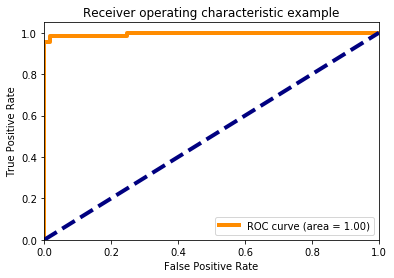

In [6]:
plt.figure()
lw = 4
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## PCA algoritam

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import math

cancer_data1= pd.read_csv("train1.csv")
cancer_data2= pd.read_csv("train2.csv")
cancer_data = pd.concat([cancer_data1, cancer_data2])
cancer_data.drop(['id'], axis=1, inplace=True)
cancer_data['diagnosis'] = [1 if b=='M' else 0 for b in cancer_data.diagnosis]

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

majority_data = cancer_data[cancer_data.diagnosis==0]
minority_data = cancer_data[cancer_data.diagnosis==1]

majority_data_downsampled = resample(majority_data, replace=False, n_samples=212, random_state=123)

cancer_data_downsampled = pd.concat([majority_data_downsampled, minority_data])
cancer_data_downsampled.diagnosis.value_counts()

X= cancer_data_downsampled.drop("diagnosis", axis=1)
y= cancer_data_downsampled["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [4]:
explained_variance = pca.explained_variance_ratio_


In [5]:
explained_variance

array([4.71155779e-01, 1.70935406e-01, 9.10978630e-02, 6.23542869e-02,
       5.62453774e-02, 4.13968284e-02, 2.55951293e-02, 1.56186980e-02,
       1.43791936e-02, 9.82219428e-03, 9.35631242e-03, 7.53668020e-03,
       5.19307818e-03, 4.65135135e-03, 3.03836926e-03, 2.21773657e-03,
       1.83386257e-03, 1.70073733e-03, 1.17514174e-03, 9.45503247e-04,
       8.95107812e-04, 7.61525919e-04, 7.38927022e-04, 5.33278698e-04,
       3.07758145e-04, 2.33965912e-04, 2.06764377e-04, 4.96552839e-05,
       1.88600461e-05, 4.62858255e-06])

#### Na osnovu dobijenog niza može se videti koliko koji atribut procentualno varijacija izaziva na izlazu.

## Korišćenje PCA za predviđanje jedne principijalne komponenete, na osnovu koje se vrši treniranje

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [7]:
logmodel2=LogisticRegression()
logmodel2.fit(X_train, y_train)
predictions = logmodel2.predict(X_test)


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[52,  9],
       [10, 57]])

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

85.15625

## Korišćenje PCA za predviđanje dve principijalne komponenete, na osnovu koje se vrši treniranje

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

logmodel2=LogisticRegression()
logmodel2.fit(X_train, y_train)
predictions = logmodel2.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[57,  4],
       [ 5, 62]])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

92.96875

## Korišćenje PCA za predviđanje tri principijalne komponenete, na osnovu koje se vrši treniranje

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

logmodel2=LogisticRegression()
logmodel2.fit(X_train, y_train)
predictions = logmodel2.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[57,  4],
       [ 9, 58]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

89.84375

#### Treniranje sa svim atributima

In [28]:
logmodel2=LogisticRegression()
logmodel2.fit(X_train, y_train)
predictions = logmodel2.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[60,  1],
       [ 2, 65]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

97.65625

## Random Forest


#### Pre treniranja modela neophodno je učitati potreban dataset. Kod za ovaj deo je izostavljen jer se pojavljuje u delu iznad (prvi skup naredbi u delu za PCA)

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[60,  1],
       [ 2, 65]])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

97.65625